In [13]:
import time

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from scipy import misc
import matplotlib.pyplot as plt

In [6]:
face = misc.face(gray=True)

In [28]:
len(face)

256

In [29]:
from PIL import Image
height = 70
width  = 70
# face = sp.misc.imresize(face, 0.10) / 255.
face = np.array(Image.fromarray(face).resize((height, width), Image.BILINEAR)).astype(np.double)

In [30]:
# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(face)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 5

C:\Users\kurud\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'contours'
  # This is added back by InteractiveShellApp.init_path()


Spectral clustering: kmeans, 2.11s


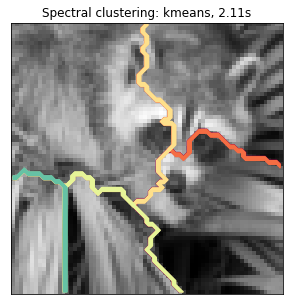

Spectral clustering: discretize, 2.23s


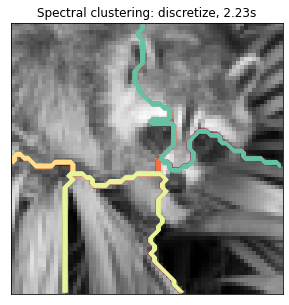

In [35]:
for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(face.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(face, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l, contours=1,colors=[plt.get_cmap('Spectral')(l / float(N_REGIONS))])
        
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
    plt.show()

In [36]:
graph

<4900x4900 sparse matrix of type '<class 'numpy.float64'>'
	with 24220 stored elements in COOrdinate format>